In [5]:
from typing import Tuple
import pandas as pd
import numpy as np

from pathlib import Path
from matplotlib import pyplot, image

In [6]:
def returnAnnotations(file_attributos, file_annotations):
  df_attributes = pd.read_csv(file_attributos, header = None)
  list_attributes = list()
  list_attributes.append(df_attributes[0].values)
  handle = open(file_annotations)
  scores = dict()
  confidence = dict()
  for line in handle:
      words = line.split()
      i=0
      for word in words:
          if i == 0:
              scores[word]=list()
              confidence[word] = list()
              i+=1
          else:
              values = word.split(',')
              scores[words[0]].append(float(values[0]))
              confidence[words[0]].append(float(values[1]))
              i+=1
  scores = pd.DataFrame(scores).T
  scores.columns = list_attributes
  confidence = pd.DataFrame(confidence).T
  confidence.columns = list_attributes
  return scores,confidence


In [7]:
file_attributos = '../../data/annotations/attributes.txt'
file_annotations = '../../data/annotations/annotations.tsv'
file_training = '../../data/training_test_splits/holdout_split/training.txt'
file_test = '../../data/training_test_splits/holdout_split/test.txt'
def returnTrainingTest(file_attributos, file_annotations, file_training, file_test):
  scores,confidence = returnAnnotations(file_attributos, file_annotations)
  df_training = pd.read_csv(file_training, header = None)
  df_test = pd.read_csv(file_test, header = None)
  scores_training = scores[scores.index.isin(df_training[0].values)]
  scores_test = scores[scores.index.isin(df_test[0].values)]
  confidence_training = confidence[confidence.index.isin(df_training[0].values)]
  confidence_test = confidence[confidence.index.isin(df_test[0].values)]
  return scores_training, scores_test, confidence_training, confidence_test

In [8]:
scores_training, scores_test, confidence_training, confidence_test = returnTrainingTest(file_attributos, file_annotations, file_training, file_test)

In [9]:
scores_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,0.213370,0.83585,0.138240,0.164860,0.624940,0.386150,0.339510,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.23348,0.129520,0.057863,0.119120,0.095998,0.630750,0.410520,0.175360
00000064/101.jpg,0.087876,0.86553,0.038267,0.046497,0.062170,1.000000,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.66869,0.078056,0.392200,0.124100,0.141060,0.018542,0.142430,0.388870
00000064/106.jpg,0.231350,0.73344,0.038267,0.164860,0.118550,0.386150,0.564970,0.019698,0.493610,0.023848,...,0.022540,0.49180,0.32528,0.013640,0.057863,0.025097,0.095998,0.687330,0.419110,0.047206
00000064/107.jpg,0.406980,0.56384,0.862520,0.164860,0.800930,0.043308,0.188200,0.156150,0.023172,0.046109,...,0.022540,0.49180,0.14167,0.378730,0.057863,0.069622,0.177450,0.780870,0.533500,0.047206
00000064/109.jpg,0.257200,0.25579,0.686770,0.046497,0.551150,0.043308,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.56672,0.51443,0.013640,0.165460,0.124100,0.267560,0.018542,0.499370,0.047206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0.081369,1.00000,0.032815,0.005487,0.022595,1.000000,0.146520,0.051587,0.000000,0.022788,...,0.044502,0.18885,0.29076,0.032437,0.047200,0.037370,0.247540,0.000000,0.073662,0.036722
90000014/92.jpg,0.019562,0.94944,0.032815,0.005487,0.191390,0.449780,0.293900,0.051587,0.136960,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.247540,0.000000,0.073662,0.277750
90000014/93.jpg,0.019562,0.94944,0.032815,0.092225,0.064793,0.559590,0.293900,0.051587,0.064861,0.071293,...,0.044502,0.18885,0.40882,0.094569,0.168960,0.032379,0.172280,0.028431,0.073662,0.277750
90000014/95.jpg,0.019562,0.94944,0.032815,0.005487,0.444570,0.449780,0.091672,0.051587,0.041245,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.172280,0.000000,0.073662,0.337680


In [10]:
scores_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,0.78485,0.13722,0.154100,0.040839,0.212650,0.016391,1.000000,0.860690,0.763550,0.660870,...,0.146090,0.71623,0.184200,0.941410,0.013662,0.053484,0.081992,0.409010,0.79530,0.107840
00000090/10.jpg,0.78485,0.24387,0.154100,0.357350,0.244340,0.016391,0.962260,0.690630,0.143310,0.023285,...,0.146090,0.51145,0.081465,0.739920,0.013662,0.053484,0.040081,0.409010,0.73766,0.198510
00000090/104.jpg,0.42252,0.94661,0.203790,0.040839,0.055406,0.375890,0.560730,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.205130,0.058799,0.219860,0.053484,0.081992,0.054612,0.35821,0.057435
00000090/105.jpg,0.08370,0.94661,0.154100,0.088234,0.055406,0.791360,0.012467,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.484650,0.058799,0.225320,0.053484,0.040081,0.054612,0.15082,0.148100
00000090/107.jpg,0.43993,0.60259,0.253480,0.350100,0.502940,0.016391,0.290090,0.415420,0.326540,0.023285,...,0.140700,0.67882,0.081465,0.622540,0.013662,0.053484,0.040081,0.175380,0.61165,0.107840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0.11458,0.12450,0.602250,0.853060,0.665520,0.026988,0.030991,0.116580,0.174340,0.000000,...,0.164850,0.77773,0.068099,0.508590,0.450080,0.379310,0.699290,0.666160,0.71806,0.275820
90000013/86.jpg,0.11458,0.85071,0.092844,0.274790,0.217740,0.661940,0.155460,0.044431,0.127690,0.025132,...,0.033395,0.78439,0.203710,0.433350,0.675170,0.112220,0.596450,0.309020,0.01687,0.275820
90000013/89.jpg,0.24364,0.94378,0.067642,0.063162,0.311270,0.779310,0.030991,0.193780,0.090742,0.157640,...,0.033395,0.78439,0.181070,0.508590,0.723740,0.024025,0.512830,0.522520,0.24085,0.275820
90000013/9.jpg,0.22422,0.12450,0.696000,0.641430,0.682600,0.026988,0.137420,0.116580,0.174340,0.058260,...,0.033395,0.67587,0.294050,0.666620,0.450080,0.435830,0.914420,0.626840,0.53489,0.275820


In [11]:
confidence_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/101.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/106.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/107.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,5.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
00000064/109.jpg,7.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,6.0,6.0,...,5.0,7.0,7.0,5.0,6.0,6.0,7.0,6.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0
90000014/92.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0
90000014/93.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,4.0,5.0,6.0,6.0,6.0
90000014/95.jpg,5.0,6.0,6.0,6.0,6.0,6.0,7.0,5.0,5.0,6.0,...,7.0,5.0,6.0,6.0,5.0,5.0,5.0,6.0,6.0,6.0


In [12]:
confidence_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/10.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,5.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/104.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/105.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
00000090/107.jpg,6.0,6.0,7.0,6.0,7.0,6.0,6.0,6.0,5.0,5.0,...,5.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0
90000013/86.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0
90000013/89.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0
90000013/9.jpg,5.0,7.0,7.0,6.0,5.0,6.0,5.0,7.0,8.0,6.0,...,6.0,7.0,6.0,7.0,6.0,5.0,5.0,9.0,6.0,6.0


In [13]:
confidence_training = confidence_training.apply(lambda x: [0 if y <= 5 else 1 for y in x])
confidence_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
00000064/101.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
00000064/106.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
00000064/107.jpg,1,1,1,0,1,0,0,1,1,0,...,0,1,1,0,1,1,1,1,1,1
00000064/109.jpg,1,1,1,0,1,0,0,1,1,1,...,0,1,1,0,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1
90000014/92.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1
90000014/93.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1
90000014/95.jpg,0,1,1,1,1,1,1,0,0,1,...,1,0,1,1,0,0,0,1,1,1


In [14]:
confidence_test = confidence_test.apply(lambda x: [0 if y <= 5 else 1 for y in x])
confidence_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/10.jpg,1,1,1,1,1,1,1,0,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/104.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/105.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
00000090/107.jpg,1,1,1,1,1,1,1,1,0,0,...,0,0,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1
90000013/86.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1
90000013/89.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1
90000013/9.jpg,0,1,1,1,0,1,0,1,1,1,...,1,1,1,1,1,0,0,1,1,1


In [15]:
#df_training = pd.DataFrame(scores_training*confidence_training, columns=scores_training.columns, index=scores_training.index)
df_training = scores_training
df_training.columns = df_training.columns.get_level_values(0)
df_training

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,0.213370,0.83585,0.138240,0.164860,0.624940,0.386150,0.339510,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.23348,0.129520,0.057863,0.119120,0.095998,0.630750,0.410520,0.175360
00000064/101.jpg,0.087876,0.86553,0.038267,0.046497,0.062170,1.000000,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.66869,0.078056,0.392200,0.124100,0.141060,0.018542,0.142430,0.388870
00000064/106.jpg,0.231350,0.73344,0.038267,0.164860,0.118550,0.386150,0.564970,0.019698,0.493610,0.023848,...,0.022540,0.49180,0.32528,0.013640,0.057863,0.025097,0.095998,0.687330,0.419110,0.047206
00000064/107.jpg,0.406980,0.56384,0.862520,0.164860,0.800930,0.043308,0.188200,0.156150,0.023172,0.046109,...,0.022540,0.49180,0.14167,0.378730,0.057863,0.069622,0.177450,0.780870,0.533500,0.047206
00000064/109.jpg,0.257200,0.25579,0.686770,0.046497,0.551150,0.043308,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.56672,0.51443,0.013640,0.165460,0.124100,0.267560,0.018542,0.499370,0.047206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0.081369,1.00000,0.032815,0.005487,0.022595,1.000000,0.146520,0.051587,0.000000,0.022788,...,0.044502,0.18885,0.29076,0.032437,0.047200,0.037370,0.247540,0.000000,0.073662,0.036722
90000014/92.jpg,0.019562,0.94944,0.032815,0.005487,0.191390,0.449780,0.293900,0.051587,0.136960,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.247540,0.000000,0.073662,0.277750
90000014/93.jpg,0.019562,0.94944,0.032815,0.092225,0.064793,0.559590,0.293900,0.051587,0.064861,0.071293,...,0.044502,0.18885,0.40882,0.094569,0.168960,0.032379,0.172280,0.028431,0.073662,0.277750
90000014/95.jpg,0.019562,0.94944,0.032815,0.005487,0.444570,0.449780,0.091672,0.051587,0.041245,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.172280,0.000000,0.073662,0.337680


In [16]:
#df_test = pd.DataFrame(scores_test*confidence_test, columns=scores_test.columns, index=scores_test.index)
df_test = scores_test
df_test.columns = df_test.columns.get_level_values(0)
df_test

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,0.78485,0.13722,0.154100,0.040839,0.212650,0.016391,1.000000,0.860690,0.763550,0.660870,...,0.146090,0.71623,0.184200,0.941410,0.013662,0.053484,0.081992,0.409010,0.79530,0.107840
00000090/10.jpg,0.78485,0.24387,0.154100,0.357350,0.244340,0.016391,0.962260,0.690630,0.143310,0.023285,...,0.146090,0.51145,0.081465,0.739920,0.013662,0.053484,0.040081,0.409010,0.73766,0.198510
00000090/104.jpg,0.42252,0.94661,0.203790,0.040839,0.055406,0.375890,0.560730,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.205130,0.058799,0.219860,0.053484,0.081992,0.054612,0.35821,0.057435
00000090/105.jpg,0.08370,0.94661,0.154100,0.088234,0.055406,0.791360,0.012467,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.484650,0.058799,0.225320,0.053484,0.040081,0.054612,0.15082,0.148100
00000090/107.jpg,0.43993,0.60259,0.253480,0.350100,0.502940,0.016391,0.290090,0.415420,0.326540,0.023285,...,0.140700,0.67882,0.081465,0.622540,0.013662,0.053484,0.040081,0.175380,0.61165,0.107840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0.11458,0.12450,0.602250,0.853060,0.665520,0.026988,0.030991,0.116580,0.174340,0.000000,...,0.164850,0.77773,0.068099,0.508590,0.450080,0.379310,0.699290,0.666160,0.71806,0.275820
90000013/86.jpg,0.11458,0.85071,0.092844,0.274790,0.217740,0.661940,0.155460,0.044431,0.127690,0.025132,...,0.033395,0.78439,0.203710,0.433350,0.675170,0.112220,0.596450,0.309020,0.01687,0.275820
90000013/89.jpg,0.24364,0.94378,0.067642,0.063162,0.311270,0.779310,0.030991,0.193780,0.090742,0.157640,...,0.033395,0.78439,0.181070,0.508590,0.723740,0.024025,0.512830,0.522520,0.24085,0.275820
90000013/9.jpg,0.22422,0.12450,0.696000,0.641430,0.682600,0.026988,0.137420,0.116580,0.174340,0.058260,...,0.033395,0.67587,0.294050,0.666620,0.450080,0.435830,0.914420,0.626840,0.53489,0.275820


# Verificação visual do balanço do banco de dados no conjunto de treino.

/home/vinicius/academia/extensao/mdc-20221-trabalho_final/venv/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Frequencia das classes no conjunto de treino'}>

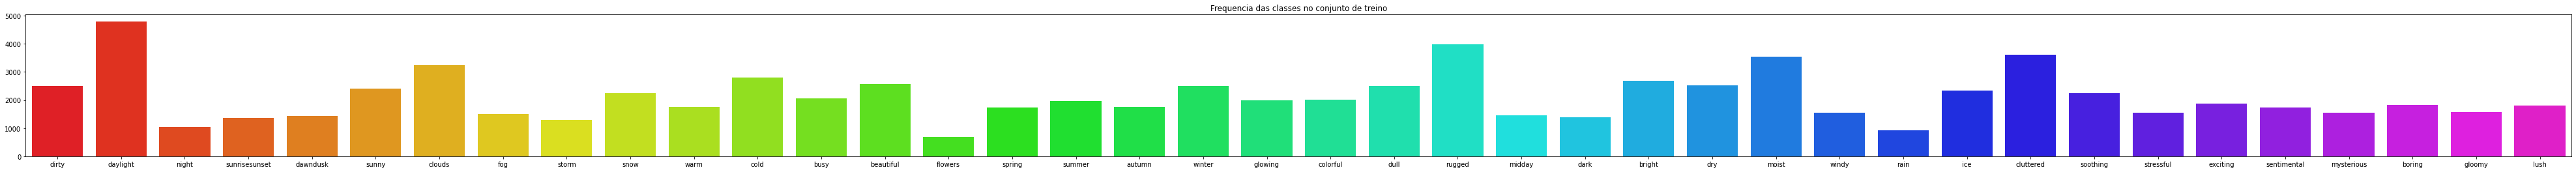

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_markdown
display_markdown('# Verificação visual do balanço do banco de dados no conjunto de treino.',raw=True)
plt.figure(figsize=(70, 4))
plt.title('Frequencia das classes no conjunto de treino')
palette = sns.color_palette('gist_rainbow', len(df_training.columns.values))
sns.barplot(df_training.columns.values, df_training.sum().values,palette=palette)

In [18]:
path_img = Path('../../data/ignored/images/imageLD/')
import os
def returnPathImages():
    imageLD = {}
    datasets = os.listdir(path_img)
    for dataset in datasets:
        imgs_name = os.listdir(path_img/Path(dataset))
        for name in imgs_name:
            img_file = path_img/Path(dataset)/Path(name)
            imageLD[str(Path(dataset)/Path(name))]=img_file
    return imageLD

In [19]:
images_paths = returnPathImages()

In [20]:
images_paths

{'00018962/20121026_211514.jpg': PosixPath('../../data/ignored/images/imageLD/00018962/20121026_211514.jpg'),
 '00018962/20120520_031510.jpg': PosixPath('../../data/ignored/images/imageLD/00018962/20120520_031510.jpg'),
 '00018962/20130104_221511.jpg': PosixPath('../../data/ignored/images/imageLD/00018962/20130104_221511.jpg'),
 '00018962/20121017_234511.jpg': PosixPath('../../data/ignored/images/imageLD/00018962/20121017_234511.jpg'),
 '00018962/20121026_031511.jpg': PosixPath('../../data/ignored/images/imageLD/00018962/20121026_031511.jpg'),
 '00018962/20120527_064521.jpg': PosixPath('../../data/ignored/images/imageLD/00018962/20120527_064521.jpg'),
 '00018962/20121217_004514.jpg': PosixPath('../../data/ignored/images/imageLD/00018962/20121217_004514.jpg'),
 '00018962/20120924_044517.jpg': PosixPath('../../data/ignored/images/imageLD/00018962/20120924_044517.jpg'),
 '00018962/20130124_211512.jpg': PosixPath('../../data/ignored/images/imageLD/00018962/20130124_211512.jpg'),
 '00018962

In [21]:
df_training_image = df_training[df_training.index.isin(images_paths.keys())]
df_training_image

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000064/1.jpg,0.213370,0.83585,0.138240,0.164860,0.624940,0.386150,0.339510,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.23348,0.129520,0.057863,0.119120,0.095998,0.630750,0.410520,0.175360
00000064/101.jpg,0.087876,0.86553,0.038267,0.046497,0.062170,1.000000,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.49180,0.66869,0.078056,0.392200,0.124100,0.141060,0.018542,0.142430,0.388870
00000064/106.jpg,0.231350,0.73344,0.038267,0.164860,0.118550,0.386150,0.564970,0.019698,0.493610,0.023848,...,0.022540,0.49180,0.32528,0.013640,0.057863,0.025097,0.095998,0.687330,0.419110,0.047206
00000064/107.jpg,0.406980,0.56384,0.862520,0.164860,0.800930,0.043308,0.188200,0.156150,0.023172,0.046109,...,0.022540,0.49180,0.14167,0.378730,0.057863,0.069622,0.177450,0.780870,0.533500,0.047206
00000064/109.jpg,0.257200,0.25579,0.686770,0.046497,0.551150,0.043308,0.188200,0.019698,0.023172,0.023848,...,0.022540,0.56672,0.51443,0.013640,0.165460,0.124100,0.267560,0.018542,0.499370,0.047206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0.081369,1.00000,0.032815,0.005487,0.022595,1.000000,0.146520,0.051587,0.000000,0.022788,...,0.044502,0.18885,0.29076,0.032437,0.047200,0.037370,0.247540,0.000000,0.073662,0.036722
90000014/92.jpg,0.019562,0.94944,0.032815,0.005487,0.191390,0.449780,0.293900,0.051587,0.136960,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.247540,0.000000,0.073662,0.277750
90000014/93.jpg,0.019562,0.94944,0.032815,0.092225,0.064793,0.559590,0.293900,0.051587,0.064861,0.071293,...,0.044502,0.18885,0.40882,0.094569,0.168960,0.032379,0.172280,0.028431,0.073662,0.277750
90000014/95.jpg,0.019562,0.94944,0.032815,0.005487,0.444570,0.449780,0.091672,0.051587,0.041245,0.022788,...,0.044502,0.18885,0.40882,0.032437,0.168960,0.037370,0.172280,0.000000,0.073662,0.337680


In [22]:
df_test_image = df_test[df_test.index.isin(images_paths.keys())]
df_test_image

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,ice,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush
00000090/1.jpg,0.78485,0.13722,0.154100,0.040839,0.212650,0.016391,1.000000,0.860690,0.763550,0.660870,...,0.146090,0.71623,0.184200,0.941410,0.013662,0.053484,0.081992,0.409010,0.79530,0.107840
00000090/10.jpg,0.78485,0.24387,0.154100,0.357350,0.244340,0.016391,0.962260,0.690630,0.143310,0.023285,...,0.146090,0.51145,0.081465,0.739920,0.013662,0.053484,0.040081,0.409010,0.73766,0.198510
00000090/104.jpg,0.42252,0.94661,0.203790,0.040839,0.055406,0.375890,0.560730,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.205130,0.058799,0.219860,0.053484,0.081992,0.054612,0.35821,0.057435
00000090/105.jpg,0.08370,0.94661,0.154100,0.088234,0.055406,0.791360,0.012467,0.031248,0.143310,0.023285,...,0.000000,0.92920,0.484650,0.058799,0.225320,0.053484,0.040081,0.054612,0.15082,0.148100
00000090/107.jpg,0.43993,0.60259,0.253480,0.350100,0.502940,0.016391,0.290090,0.415420,0.326540,0.023285,...,0.140700,0.67882,0.081465,0.622540,0.013662,0.053484,0.040081,0.175380,0.61165,0.107840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000013/83.jpg,0.11458,0.12450,0.602250,0.853060,0.665520,0.026988,0.030991,0.116580,0.174340,0.000000,...,0.164850,0.77773,0.068099,0.508590,0.450080,0.379310,0.699290,0.666160,0.71806,0.275820
90000013/86.jpg,0.11458,0.85071,0.092844,0.274790,0.217740,0.661940,0.155460,0.044431,0.127690,0.025132,...,0.033395,0.78439,0.203710,0.433350,0.675170,0.112220,0.596450,0.309020,0.01687,0.275820
90000013/89.jpg,0.24364,0.94378,0.067642,0.063162,0.311270,0.779310,0.030991,0.193780,0.090742,0.157640,...,0.033395,0.78439,0.181070,0.508590,0.723740,0.024025,0.512830,0.522520,0.24085,0.275820
90000013/9.jpg,0.22422,0.12450,0.696000,0.641430,0.682600,0.026988,0.137420,0.116580,0.174340,0.058260,...,0.033395,0.67587,0.294050,0.666620,0.450080,0.435830,0.914420,0.626840,0.53489,0.275820


In [23]:
iter_img = iter(images_paths.items())

In [24]:
a_name, a_img = next(iter_img)

In [25]:
image.imread(a_img)

array([[[235, 239, 242],
        [155, 160, 164],
        [215, 226, 230],
        ...,
        [145, 149, 150],
        [211, 215, 218],
        [128, 132, 135]],

       [[234, 239, 243],
        [178, 185, 191],
        [ 91, 102, 108],
        ...,
        [155, 159, 160],
        [179, 183, 186],
        [ 81,  85,  88]],

       [[226, 237, 243],
        [135, 146, 152],
        [215, 228, 236],
        ...,
        [149, 150, 152],
        [205, 209, 212],
        [ 98, 102, 105]],

       ...,

       [[ 83,  71,  59],
        [ 80,  68,  56],
        [ 80,  68,  56],
        ...,
        [ 57,  62,  65],
        [ 56,  64,  67],
        [ 55,  63,  66]],

       [[ 73,  63,  51],
        [ 74,  64,  52],
        [ 75,  65,  53],
        ...,
        [ 55,  63,  65],
        [ 55,  63,  65],
        [ 53,  61,  63]],

       [[ 73,  63,  51],
        [ 74,  64,  52],
        [ 78,  68,  56],
        ...,
        [ 55,  63,  65],
        [ 56,  64,  66],
        [ 56,  64,  66]]

In [26]:
a_name

'00018962/20121026_211514.jpg'

In [27]:
df_training.loc[a_name]

dirty            0.978890
daylight         1.000000
night            0.007607
sunrisesunset    0.021790
dawndusk         0.105170
sunny            0.473390
clouds           0.602670
fog              0.105890
storm            0.104590
snow             0.965110
warm             0.182830
cold             0.799280
busy             0.500920
beautiful        0.124120
flowers          0.055244
spring           0.077420
summer           0.085518
autumn           0.068508
winter           0.832140
glowing          0.059263
colorful         0.120260
dull             0.003584
rugged           0.741790
midday           0.494580
dark             0.026701
bright           0.382710
dry              0.018091
moist            0.996620
windy            0.085936
rain             0.227840
ice              0.697800
cluttered        0.930130
soothing         0.327770
stressful        0.000000
exciting         0.158360
sentimental      0.158010
mysterious       0.042058
boring           0.035401
gloomy      

In [28]:
images_paths_train = {k: v for k, v in images_paths.items() if k in df_training.index}

In [29]:
images_paths_teste = {k: v for k, v in images_paths.items() if k in df_test.index}

In [30]:
data_treino = df_training.copy()
data_treino['path'] = df_training.index

In [31]:
data_teste = df_test.copy()
data_teste['path'] = df_test.index

In [32]:
data_treino

,dirty,daylight,night,sunrisesunset,dawndusk,sunny,clouds,fog,storm,snow,...,cluttered,soothing,stressful,exciting,sentimental,mysterious,boring,gloomy,lush,path
00000064/1.jpg,0.213370,0.83585,0.138240,0.164860,0.624940,0.386150,0.339510,0.019698,0.023172,0.023848,...,0.49180,0.23348,0.129520,0.057863,0.119120,0.095998,0.630750,0.410520,0.175360,00000064/1.jpg
00000064/101.jpg,0.087876,0.86553,0.038267,0.046497,0.062170,1.000000,0.188200,0.019698,0.023172,0.023848,...,0.49180,0.66869,0.078056,0.392200,0.124100,0.141060,0.018542,0.142430,0.388870,00000064/101.jpg
00000064/106.jpg,0.231350,0.73344,0.038267,0.164860,0.118550,0.386150,0.564970,0.019698,0.493610,0.023848,...,0.49180,0.32528,0.013640,0.057863,0.025097,0.095998,0.687330,0.419110,0.047206,00000064/106.jpg
00000064/107.jpg,0.406980,0.56384,0.862520,0.164860,0.800930,0.043308,0.188200,0.156150,0.023172,0.046109,...,0.49180,0.14167,0.378730,0.057863,0.069622,0.177450,0.780870,0.533500,0.047206,00000064/107.jpg
00000064/109.jpg,0.257200,0.25579,0.686770,0.046497,0.551150,0.043308,0.188200,0.019698,0.023172,0.023848,...,0.56672,0.51443,0.013640,0.165460,0.124100,0.267560,0.018542,0.499370,0.047206,00000064/109.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90000014/91.jpg,0.081369,1.00000,0.032815,0.005487,0.022595,1.000000,0.146520,0.051587,0.000000,0.022788,...,0.18885,0.29076,0.032437,0.047200,0.037370,0.247540,0.000000,0.073662,0.036722,90000014/91.jpg
90000014/92.jpg,0.019562,0.94944,0.032815,0.005487,0.191390,0.449780,0.293900,0.051587,0.136960,0.022788,...,0.18885,0.40882,0.032437,0.168960,0.037370,0.247540,0.000000,0.073662,0.277750,90000014/92.jpg
90000014/93.jpg,0.019562,0.94944,0.032815,0.092225,0.064793,0.559590,0.293900,0.051587,0.064861,0.071293,...,0.18885,0.40882,0.094569,0.168960,0.032379,0.172280,0.028431,0.073662,0.277750,90000014/93.jpg
90000014/95.jpg,0.019562,0.94944,0.032815,0.005487,0.444570,0.449780,0.091672,0.051587,0.041245,0.022788,...,0.18885,0.40882,0.032437,0.168960,0.037370,0.172280,0.000000,0.073662,0.337680,90000014/95.jpg


In [33]:
data_treino.columns[:-1]

Index(['dirty', 'daylight', 'night', 'sunrisesunset', 'dawndusk', 'sunny',
       'clouds', 'fog', 'storm', 'snow', 'warm', 'cold', 'busy', 'beautiful',
       'flowers', 'spring', 'summer', 'autumn', 'winter', 'glowing',
       'colorful', 'dull', 'rugged', 'midday', 'dark', 'bright', 'dry',
       'moist', 'windy', 'rain', 'ice', 'cluttered', 'soothing', 'stressful',
       'exciting', 'sentimental', 'mysterious', 'boring', 'gloomy', 'lush'],
      dtype='object')

In [34]:
data_treino.columns[-1]

'path'

In [35]:
img_height = 224
img_width = 224

In [36]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
datagen = ImageDataGenerator(validation_split=0.2, preprocessing_function=preprocess_input)

2022-07-12 03:18:37.573104: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/gurobi912/linux64/lib
2022-07-12 03:18:37.573138: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [37]:
train_generator = datagen.flow_from_dataframe(dataframe=data_treino, directory=path_img,
                                              target_size=(img_height, img_width),
                                              x_col='path',
                                              y_col=data_treino.columns[:-1],
                                              class_mode="raw",
                                              subset='training',
                                              shuffle=True,
                                              seed=7)

validation_generator = datagen.flow_from_dataframe(dataframe=data_treino, directory=path_img,
                                             target_size=(img_height, img_width),
                                             x_col='path',
                                             y_col=data_treino.columns[:-1],
                                             class_mode="raw",
                                             subset='validation',
                                             shuffle=True,
                                             seed=7)

test_generator = datagen.flow_from_dataframe(dataframe=data_teste, directory=path_img,
                                             target_size=(img_height, img_width),
                                             x_col='path',
                                             y_col=data_treino.columns[:-1],
                                             class_mode="raw",
                                             shuffle=False,
                                             seed=7)

Found 5524 validated image filenames.
Found 1380 validated image filenames.
Found 1667 validated image filenames.


In [38]:
model_feature_extraction = VGG16(weights='imagenet', include_top=False)

2022-07-12 03:18:40.589290: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/opt/gurobi912/linux64/lib
2022-07-12 03:18:40.589310: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-07-12 03:18:40.589328: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (vinicius-desktop): /proc/driver/nvidia/version does not exist
2022-07-12 03:18:40.590019: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [39]:
# validation_features = model_feature_extraction.predict(validation_generator)

In [40]:
# train_features = model_feature_extraction.predict(train_generator)

In [41]:
# test_features = model_feature_extraction.predict(test_generator)

In [42]:
# np.save('validation_features', validation_features)

In [43]:
# np.save('train_features', train_features)

In [44]:
# np.save('test_features', test_features)

In [46]:
validation_features = np.load('validation_features.npy')

In [47]:
train_features = np.load('train_features.npy')

In [48]:
test_features = np.load('test_features.npy')

In [49]:
from sklearn.svm import SVR, LinearSVR
from sklearn.multioutput import MultiOutputRegressor

In [50]:
clf = MultiOutputRegressor(LinearSVR())

In [51]:
X_train = np.array([np.array(e).flatten() for e in train_features])
y_train = df_training.loc[train_generator.filenames]

In [52]:
X_train.shape

(5524, 25088)

In [53]:
i = iter(X_train)

In [54]:
next(i).shape

(25088,)

In [ ]:
clf.fit(X_train, y_train)

/home/vinicius/academia/extensao/mdc-20221-trabalho_final/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinicius/academia/extensao/mdc-20221-trabalho_final/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinicius/academia/extensao/mdc-20221-trabalho_final/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinicius/academia/extensao/mdc-20221-trabalho_final/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/vinicius/academia/extensao/mdc-20221-trabalho_final/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:1225: Co

In [ ]:
df_training.loc[validation_generator.filenames]

In [ ]:
for i in validation_generator.filenames:
    print(i)